Hi Jeel, thank you for addressing the feedback and resolving the issues in your project! 🎉 Your updates look great, and I’m happy to approve your project. Fantastic work on implementing the changes and ensuring everything runs smoothly. Keep up the excellent effort, and best of luck with your next steps! 😊

Hi Jeel, thank you for submtting project after changes but I am not able to see the outputs please run the cells again and resubmit. All the best

Hi Jeel,

Thank you for submitting the project. I have provided feedback on your code. Please review the yellow comments for suggestions on improving your code, and the red comments indicate mistakes that need to be corrected. Once these are resolved, kindly resubmit the project for approval. If you have any questions, feel free to reach out. All the best!

Please find my comments below—**I kindly ask that you do not move, modify, or delete them**.

You can find my comments highlighted in green, yellow, or red boxes like this:

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Success. Everything is done succesfully.

</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Remarks. Some recommendations.

</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.

</div>

You can answer me by using this:

<div class="alert alert-block alert-info">
<b>Student answer</b> <a class="tocSkip"></a>

</div>

# How to Determine A New Well for OilyGiant Mining Company

## Introduction

The project is to find the best place for a new well for the OilyGiant mining company using the data on oil samples from three regions. For this, collect the oil well parameters in the selected region that is the oil quality and volume of reserves. Following this, a model is build to predict the volume of reserves in the new wells. Lastly, after predicting the volume of reserves in the new wells, pick the oil wells with the highest estimated values and the region with the highest profit margin for the selected oil wells along with risks using the Bootstrapping technique. 

## Data Overview

In [1]:
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np 
from scipy import stats as st

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
data_0 = pd.read_csv('/datasets/geo_data_0.csv')
data_1 = pd.read_csv('/datasets/geo_data_1.csv')
data_2 = pd.read_csv('/datasets/geo_data_2.csv')

In [4]:
display(data_0.head())

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [5]:
display(data_1.head())

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [6]:
display(data_2.head())

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Good Work!

</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

I would recommend plotting a histogram for all regions for getting visual insight to help prepare for next steps
    
see the code example below : 
    
    data_all = [
    data_0.drop('id', axis=1),
    data_1.drop('id', axis=1),
    data_2.drop('id', axis=1),
]
    
        %matplotlib inline
        import matplotlib.pyplot as plt

        for data in data_all:
            plt.figure()
            data['product'].hist()

</div>

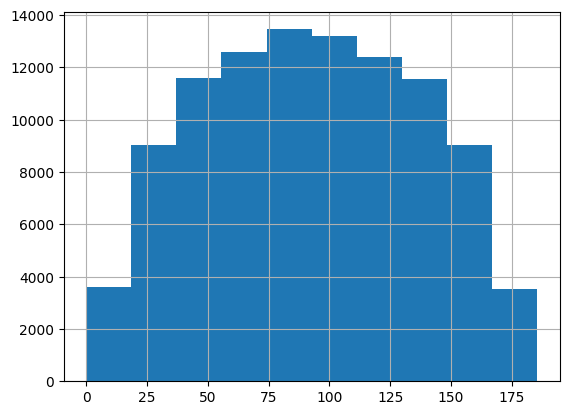

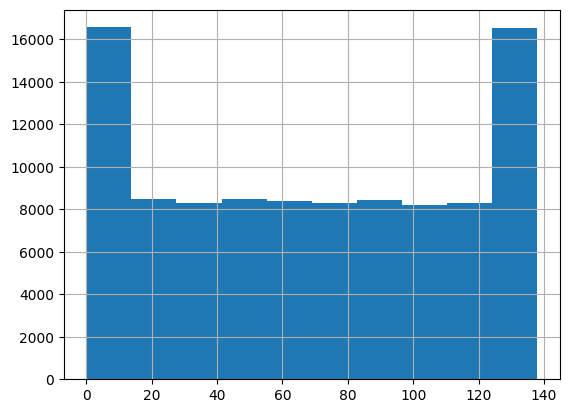

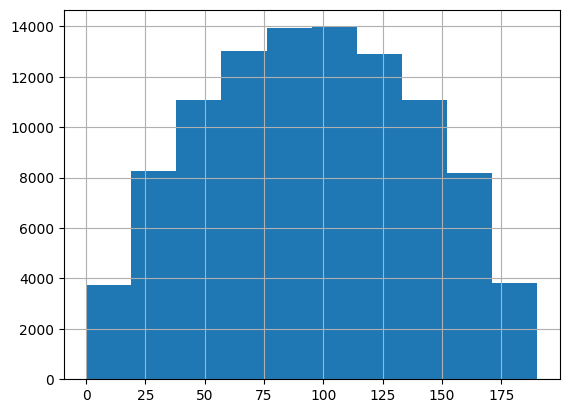

In [7]:
data_all = [
    data_0.drop('id', axis=1),
    data_1.drop('id', axis=1),
    data_2.drop('id', axis=1)]

for data in data_all:
    plt.figure()
    data['product'].hist()

The first histogram appears to have a symmetric, bell-shaped distribution which shows that this data is a normal distribution, which represents that the data is evenly distributed around mean. It also indicates that product - volume of reserves in the oil well has natural variation. The second histogram appears to have high frequencies at both ends and low frequencies in the middle part which looks like U-shaped distribution. This might represent that the data is split into two distinct groups, one where the wells might have low volume of reserves, while other where the wells might have high volume of reserves and rest very few wells in between those groups. Lastly, the third histogram is similar to first histogram, but a slight different spread compared to first histogram. 

## Data Preprocessing

In [8]:
n_rows, n_cols = data_0.shape
print(f"The DataFrame has {n_rows} rows and {n_cols} columns")

The DataFrame has 100000 rows and 5 columns


In [9]:
n_rows, n_cols = data_1.shape
print(f"The DataFrame has {n_rows} rows and {n_cols} columns")

The DataFrame has 100000 rows and 5 columns


In [10]:
n_rows, n_cols = data_2.shape
print(f"The DataFrame has {n_rows} rows and {n_cols} columns")

The DataFrame has 100000 rows and 5 columns


In [11]:
data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [12]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [13]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [14]:
data_0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [15]:
data_1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [16]:
data_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


### Duplicates

In [17]:
duplicated_data_0 = data_0[data_0.duplicated()]
display(f"Number of duplicated data: {duplicated_data_0.shape[0]}")

'Number of duplicated data: 0'

In [18]:
duplicated_data_1 = data_1[data_1.duplicated()]
display(f"Number of duplicated data: {duplicated_data_1.shape[0]}")

'Number of duplicated data: 0'

In [19]:
duplicated_data_2 = data_2[data_2.duplicated()]
display(f"Number of duplicated data: {duplicated_data_2.shape[0]}")

'Number of duplicated data: 0'

### Missing Values

In [20]:
display(data_0.isna().sum())
data_0.isnull().sum()/len(data_0)

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

id         0.0
f0         0.0
f1         0.0
f2         0.0
product    0.0
dtype: float64

In [21]:
display(data_1.isna().sum())
data_1.isnull().sum()/len(data_1)

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

id         0.0
f0         0.0
f1         0.0
f2         0.0
product    0.0
dtype: float64

In [22]:
display(data_2.isna().sum())
data_2.isnull().sum()/len(data_2)

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

id         0.0
f0         0.0
f1         0.0
f2         0.0
product    0.0
dtype: float64

There were no duplicates, or missing values found in these datasets. 

## Data Analysis

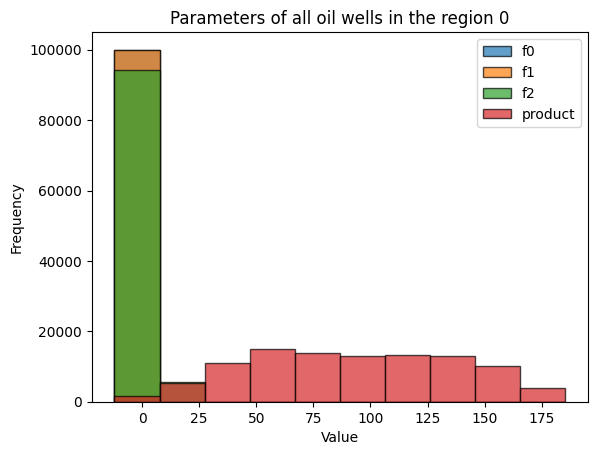

In [23]:
data_0.plot.hist(bins=10, edgecolor='black', alpha=0.7)

plt.title("Parameters of all oil wells in the region 0")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.show()

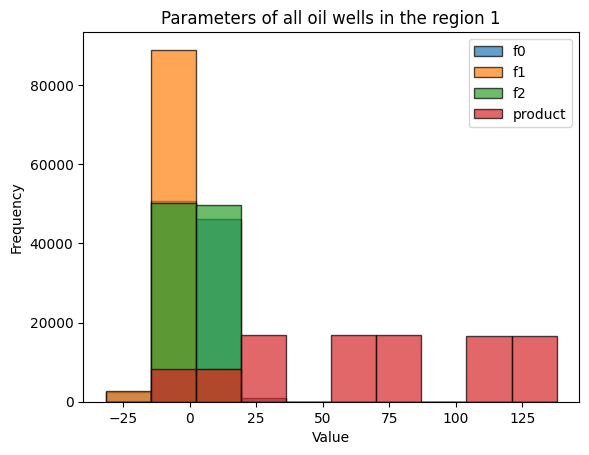

In [24]:
data_1.plot.hist(bins=10, edgecolor='black', alpha=0.7)

plt.title("Parameters of all oil wells in the region 1")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.show()

The graph above includes f0, f1, f2 and product which represent geological data which helps one to predict the wells' behavior, performance, potential oil production in region 1. From this, it can be seen that most of the wells in this region have positive feature points which some have negative feature points which might have resulted in lower volume of reserves in the oil wells in this region. 

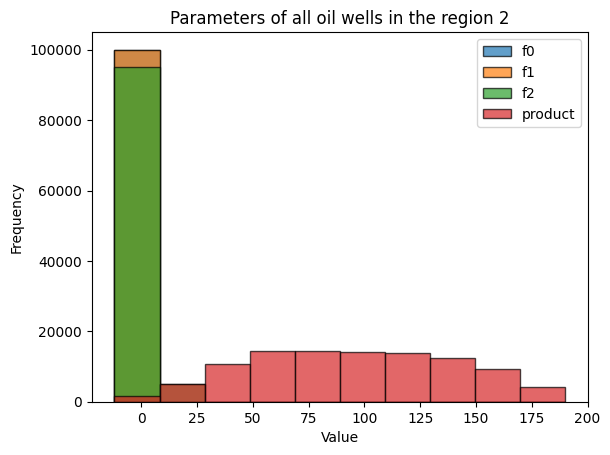

In [25]:
data_2.plot.hist(bins=10, edgecolor='black', alpha=0.7)

plt.title("Parameters of all oil wells in the region 2")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.show()

The graph above includes f0, f1, f2 and product which represent geological data which helps one to predict the wells' behavior, performance, potential oil production in region 2. From this, it can be seen that all the wells in this region have positive feature points due to which most of the wells in this area have highest volume of reserves in the oil wells. 

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

<s>the above step is not that necessary instead plotting the histogram would be better way to move ahead. good efforts

</div>

## Machine Learning

In [26]:
print(data_0.dtypes)

print(data_1.dtypes)

print(data_2.dtypes)

id          object
f0         float64
f1         float64
f2         float64
product    float64
dtype: object
id          object
f0         float64
f1         float64
f2         float64
product    float64
dtype: object
id          object
f0         float64
f1         float64
f2         float64
product    float64
dtype: object


In [27]:
features_region_0= data_0.drop(['product'], axis=1)
print(features_region_0.shape)

target_region_0 = data_0['product']
print(target_region_0.shape)

(100000, 4)
(100000,)


In [28]:
features_region_1 = data_1.drop(['product'], axis=1)
print(features_region_1.shape)

target_region_1 = data_1['product']
print(target_region_1.shape)

(100000, 4)
(100000,)


In [29]:
features_region_2 = data_2.drop(['product'], axis=1)
print(features_region_2.shape)

target_region_2 = data_2['product']
print(target_region_2.shape) 

(100000, 4)
(100000,)


In [30]:
data_0 = data_0.drop(['id'], axis=1)

data_1 = data_1.drop(['id'], axis=1)

data_2 = data_2.drop(['id'], axis=1)


In [31]:
region_0_train, region_0_valid = train_test_split(data_0, test_size=0.25, random_state=7)
display(region_0_train.shape)
display(region_0_valid.shape)

(75000, 4)

(25000, 4)

In [32]:
features_region_0_train = region_0_train.drop(['product'], axis=1)
print(features_region_0_train.shape)

target_region_0_train = region_0_train['product']
print(target_region_0_train.shape)

(75000, 3)
(75000,)


In [33]:
features_region_0_valid = region_0_valid.drop(['product'], axis=1)
print(features_region_0_valid .shape)

target_region_0_valid = region_0_valid['product']
print(target_region_0_valid.shape)

(25000, 3)
(25000,)


In [34]:
region_1_train, region_1_valid = train_test_split(data_1, test_size=0.25, random_state=7)
display(region_1_train.shape)
display(region_1_valid.shape)

(75000, 4)

(25000, 4)

In [35]:
features_region_1_train = region_1_train.drop(['product'], axis=1)
print(features_region_1_train.shape)

target_region_1_train = region_1_train['product']
print(target_region_1_train.shape)

(75000, 3)
(75000,)


In [36]:
features_region_1_valid = region_1_valid.drop(['product'], axis=1)
print(features_region_1_valid.shape)

target_region_1_valid = region_1_valid['product']
print(target_region_1_valid.shape)

(25000, 3)
(25000,)


In [37]:
region_2_train, region_2_valid = train_test_split(data_2, test_size=0.25, random_state=7)
display(region_2_train.shape)
display(region_2_valid.shape)

(75000, 4)

(25000, 4)

In [38]:
features_region_2_train = region_2_train.drop(['product'], axis=1)
print(features_region_2_train.shape)

target_region_2_train = region_2_train['product']
print(target_region_2_train.shape)

(75000, 3)
(75000,)


In [39]:
features_region_2_valid = region_2_valid.drop(['product'], axis=1)
print(features_region_2_valid.shape)

target_region_2_valid = region_2_valid['product']
print(target_region_2_valid.shape)

(25000, 3)
(25000,)


In [40]:
model = LinearRegression() 
model.fit(features_region_0_train, target_region_0_train)
predictions_region_0_valid = model.predict(features_region_0_valid)

avg_volume_region_0 = predictions_region_0_valid.mean()
print("Average volume of the linear regression model on the region 0 validation set:", avg_volume_region_0)

rmse_region_0 = mean_squared_error(target_region_0_valid, predictions_region_0_valid) ** 0.5 
print("RMSE of the linear regression model on the region 0 validation set:", rmse_region_0)

region_0 = pd.DataFrame({
    'predictions': predictions_region_0_valid,
    'target': target_region_0_valid})


Average volume of the linear regression model on the region 0 validation set: 92.50122097236377
RMSE of the linear regression model on the region 0 validation set: 37.61698862149409


Using the above Linear Regression model, average model on the region 0 validation set is 92.5 while RMSE is 37.6. The RMSE value of 37.62 indicates that on average the model's predictions deviate by 37,620 barrels from the actual values in the validation set. 

In [41]:
model = LinearRegression() 
model.fit(features_region_1_train, target_region_1_train)
predictions_region_1_valid = model.predict(features_region_1_valid)

avg_volume_region_1 = predictions_region_1_valid.mean()
print("Average volume of the linear regression model on the region 1 validation set:", avg_volume_region_1)

rmse_region_1 = mean_squared_error(target_region_1_valid, predictions_region_1_valid) ** 0.5 
print("RMSE of the linear regression model on the region 1 validation set:", rmse_region_1)

region_1 = pd.DataFrame({
    'predictions': predictions_region_1_valid,
    'target': target_region_1_valid})


Average volume of the linear regression model on the region 1 validation set: 68.81713795297324
RMSE of the linear regression model on the region 1 validation set: 0.8901574284390851


Using the above Linear Regression model, average model on the region 1 validation set is 68.8 while RMSE is 0.89. This indicates a better-performing model compared to that of region 0 and region 2. Low RMSE suggests that the linear regression model is highly accurate for predicting the oil reserved in the region 1 validation set. The RMSE value of 0.89 indicates that on average the model's predictions deviate by 890 barrels from the actual values in the validation set. Comparing RMSE to that of region 0 and 2, this is a small error, making the model suitable for practical applications requiring precise predictions. 

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Good job
    
</div>

In [42]:
model = LinearRegression() 
model.fit(features_region_2_train, target_region_2_train)
predictions_region_2_valid = model.predict(features_region_2_valid)

avg_volume_region_2 = predictions_region_2_valid.mean()
print("Average volume of the linear regression model on the region 2 validation set:", avg_volume_region_2)

rmse_region_2 = mean_squared_error(target_region_2_valid, predictions_region_2_valid) ** 0.5 
print("RMSE of the linear regression model on the region 2 validation set:", rmse_region_2)

region_2 = pd.DataFrame({
    'predictions': predictions_region_2_valid,
    'target': target_region_2_valid})


Average volume of the linear regression model on the region 2 validation set: 94.82396409311703
RMSE of the linear regression model on the region 2 validation set: 39.926127352654355


Using the above Linear Regression model, average model on the region 2 validation set is 94.8 while RMSE is 39.9. The RMSE value of 39.92 indicates that on average the model's predictions deviate by 39,926 barrels from the actual values in the validation set. The average volume on the region 2 validation set is 94.82 shows that the error is substantial, making the model's predictions unreliable for precise estimation. 

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Good job
    
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Remarks. Some recommendations.



for the traintest split and the model building you are doing repeated work which is less efficient you can use the for loop and do train test split and model training without having to do it saperately each time see the example here :

for region in range(len(data_all))
    
</div>

In [43]:
display(avg_volume_region_1, avg_volume_region_2)

68.81713795297324

94.82396409311703

In [44]:
# Store all key values for calculations in separate variables. 

budget = 100000000
revenue_per_barrel = 4.5
wells_to_develop = 200 
revenue_per_thousand_barrels = revenue_per_barrel * 1000
max_risk_percentage = 2.5 
cost_per_well = budget / wells_to_develop
display(cost_per_well)

500000.0

In [45]:
# Calculate the volume of reserves sufficient for developing a new well without losses. Compete the obtained value with the average volume of reserves in each region. 

sufficient_volume_of_reserves = cost_per_well / revenue_per_thousand_barrels
print(sufficient_volume_of_reserves)

111.11111111111111


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

good job finding amount of product for 0  profit 

    
</div>

In [46]:
# Provide the findings about the preparation for profit calculation step.

print("Region 1 is profitable:", avg_volume_region_0 > sufficient_volume_of_reserves)

print("Region 2 is profitable:", avg_volume_region_1 > sufficient_volume_of_reserves)

print("Region 3 is profitable:", avg_volume_region_2 > sufficient_volume_of_reserves)

Region 1 is profitable: False
Region 2 is profitable: False
Region 3 is profitable: False


111 thousand barrels volume of reserves are sufficient for developing a new well without losses in any regions. For region 0, region 1, region 2, the average volume of reserves is 92.5, 68.81, and 94.82 respectively. It shows that the average volume of reserves among all regions is less than the volume of reserves sufficient for developing a new well without losses. This shows that on average developing new wells in all regions would result in losses. 

In [47]:
# Pick the wells with the highest values of predictions. 

highest_predictions_region_0  = region_0.sort_values(by='predictions', ascending=False)
print(highest_predictions_region_0)

       predictions      target
93073   180.092092  162.810993
43388   175.565425   96.893581
22500   175.491569  155.212534
42379   170.800948  159.784912
34331   168.607779  184.660576
...            ...         ...
32867    13.999132   87.491866
46299    12.718466   32.109446
88683    10.254308   49.374929
44754    10.131067   40.181343
36172     8.757170   25.956984

[25000 rows x 2 columns]


In [48]:
highest_predictions_region_1  = region_1.sort_values(by='predictions', ascending=False)
print(highest_predictions_region_1)

       predictions      target
42738   139.837429  137.945408
38665   139.803512  137.945408
35200   139.624082  137.945408
84991   139.580873  137.945408
75153   139.500468  137.945408
...            ...         ...
56204    -1.543396    0.000000
38735    -1.593265    0.000000
21570    -1.624423    0.000000
68772    -1.638819    0.000000
1411     -1.876202    0.000000

[25000 rows x 2 columns]


In [49]:
highest_predictions_region_2  = region_2.sort_values(by='predictions', ascending=False)
print(highest_predictions_region_2)


       predictions      target
6647    173.893280  152.294162
84047   169.674601  151.655778
84970   165.499300  125.130392
89165   164.511282   97.775979
64380   163.797707  122.460897
...            ...         ...
19674    27.631064   63.290753
95066    22.043818   39.244130
36323    20.088333   60.244891
38979    19.580602   62.300286
95257    16.586544   21.727508

[25000 rows x 2 columns]


In [50]:
# Summarize the target volume of reserves in accordance with these predictions

highest_predictions_target_region_0 = highest_predictions_region_0['target']
display(highest_predictions_target_region_0.head(5))

highest_predictions_target_region_1 = highest_predictions_region_1['target']
display(highest_predictions_target_region_1.head(5))


highest_predictions_target_region_2 = highest_predictions_region_2['target']
display(highest_predictions_target_region_2.head(5))


93073    162.810993
43388     96.893581
22500    155.212534
42379    159.784912
34331    184.660576
Name: target, dtype: float64

42738    137.945408
38665    137.945408
35200    137.945408
84991    137.945408
75153    137.945408
Name: target, dtype: float64

6647     152.294162
84047    151.655778
84970    125.130392
89165     97.775979
64380    122.460897
Name: target, dtype: float64

111 thousand barrels volume of reserves are sufficient for developing a new well without losses in any regions. Among all 3 regions, region 3's average volume of reserve is 94.82 which is closest to the volume of reserves sufficient for developing a new well without losses. Alzxong with it, predictions and target are closest and higher than 111 thousand barrels. Due to this, I think region 2 is best for oil wells' development among all three regions. 

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

~~Please try to provide the reasoning as well as with some details to the findings~~

</div>

In [51]:
# Calculate the profit for the obtained volume of reserves.

revenue_region_0 = highest_predictions_region_0['target'] * 4500

region_0_cal = pd.DataFrame({
    'predictions': highest_predictions_region_0['predictions'],
    'target': highest_predictions_region_0['target'],
    'revenue': revenue_region_0})
print(region_0_cal)

       predictions      target        revenue
93073   180.092092  162.810993  732649.466640
43388   175.565425   96.893581  436021.112931
22500   175.491569  155.212534  698456.404104
42379   170.800948  159.784912  719032.102265
34331   168.607779  184.660576  830972.592679
...            ...         ...            ...
32867    13.999132   87.491866  393713.398012
46299    12.718466   32.109446  144492.506588
88683    10.254308   49.374929  222187.182513
44754    10.131067   40.181343  180816.044396
36172     8.757170   25.956984  116806.427489

[25000 rows x 3 columns]


In [52]:
revenue_region_1 = highest_predictions_region_1['target'] * 4500

region_1_cal = pd.DataFrame({
    'predictions': highest_predictions_region_1['predictions'],
    'target': highest_predictions_region_1['target'],
    'revenue': revenue_region_1})
print(region_1_cal)

       predictions      target        revenue
42738   139.837429  137.945408  620754.334834
38665   139.803512  137.945408  620754.334834
35200   139.624082  137.945408  620754.334834
84991   139.580873  137.945408  620754.334834
75153   139.500468  137.945408  620754.334834
...            ...         ...            ...
56204    -1.543396    0.000000       0.000000
38735    -1.593265    0.000000       0.000000
21570    -1.624423    0.000000       0.000000
68772    -1.638819    0.000000       0.000000
1411     -1.876202    0.000000       0.000000

[25000 rows x 3 columns]


In [53]:
revenue_region_2 = highest_predictions_region_2['target'] * 4500

region_2_cal = pd.DataFrame({
    'predictions': highest_predictions_region_2['predictions'],
    'target': highest_predictions_region_2['target'],
    'revenue': revenue_region_2})
print(region_2_cal)

       predictions      target        revenue
6647    173.893280  152.294162  685323.726905
84047   169.674601  151.655778  682450.999336
84970   165.499300  125.130392  563086.762336
89165   164.511282   97.775979  439991.906038
64380   163.797707  122.460897  551074.034902
...            ...         ...            ...
19674    27.631064   63.290753  284808.390017
95066    22.043818   39.244130  176598.584763
36323    20.088333   60.244891  271102.007803
38979    19.580602   62.300286  280351.285046
95257    16.586544   21.727508   97773.786184

[25000 rows x 3 columns]


Based on the revenue of each oil wells among all three regions, there are some oil wells which have the highest revenue among all three regions. Along with this, in region 1 there are oil wells which have no revenue. 

In [54]:
budget = 1000000
cost_per_point = 5000
points_per_budget = budget // cost_per_point 
print(points_per_budget)
product_price = 45

200


In [55]:
def profit(target, predictions):
    predictions_sorted = predictions.sort_values(ascending=False)
    selected_points = target[predictions_sorted.index][:points_per_budget]
    product = selected_points.sum()
    revenue = product * product_price
    cost = budget
    return revenue - cost 

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

#All amounts are divided by 100 for easier operations

BUDGET = 1000000
COST_PER_POINT = 5000
POINTS_PER_BUDGET = BUDGET // COST_PER_POINT

PRODUCT_PRICE = 45  This will help you find the point per budget which is 200 use this to make it a bit less work 

    
given below is the full code to get the better idea about this 
    
 
#All amounts are divided by 100 for easier operations

BUDGET = 1000000
COST_PER_POINT = 5000
POINTS_PER_BUDGET = BUDGET // COST_PER_POINT

PRODUCT_PRICE = 45

def profit(target, predictions):
    predictions_sorted = predictions.sort_values(ascending=False)
    selected_points = target[predictions_sorted.index][:POINTS_PER_BUDGET]
    product = selected_points.sum()
    revenue = product * PRODUCT_PRICE
    cost = BUDGET
    return revenue - cost
</div>



<div class="alert alert-block alert-danger"> <b> Reviewer's Comment</b>
    
    
   yes <s>Here we need to choose best 200 points out of 500 for the profit function. So Please write a function for profit here using the hint 
</div>

<div class="alert alert-info"> <b> Student comment: </b> Did I fixed the problem you were telling me about </div>

In [56]:
# Use the bootstrapping technique with 1000 samples to find the distribution of profit. Find average profit, 95% confidence interval and risk of losses. Loss is negative profit, calculate it as a probability and then express as a percentage.

state = np.random.RandomState(7)

# print(pred_target_region0)  # (25000, 2) y_pred target

pred = region_0_cal['predictions']
target = region_0_cal['target']

# bootstrap

profits = []
for i in range(1000):
    target_subsample = target.sample(n=500, replace=True, random_state=state)
    pred_subsample = pred[target_subsample.index]

    profit_value = profit(target_subsample, pred_subsample)
    profits.append(profit_value)


In [57]:
# Calculate average profit, confidence interval, and risk of losses

profits = pd.Series(profits)

average_profit = profits.mean()
lower = profits.quantile(0.025)
upper = profits.quantile(0.975)
risk_of_losses = (profits < 0).mean() * 100

print(f"Average Profit: {average_profit:.2f}")
print(f"95% Confidence Interval: [{lower:.2f}, {upper:.2f}]")
print(f"Risk of Losses: {risk_of_losses:.2f}%")

Average Profit: 46783.54
95% Confidence Interval: [-7319.53, 103363.57]
Risk of Losses: 4.50%


Above output provides important insights about the potential profit and risks associated with developing oil wells in a region 0 using bootstrapping. Average Profit is 4678354.27 dollars which shows that on average it is expected to generate $4.68 million in profit per region and as its positive, it suggests that the investment is likely profitable. The confidence interval (CI) represents the range of possible profits for 95% of bootstrap samples. The lower bound (−7.31 million) indicates that there is a 2.5% chance the profit will be less than this. The upper bound (10.3 million) indicates that there is a 2.5% chance the profit will exceed this. While the upper bound is promising, the fact that the lower bound is negative indicates that losses are possible in some scenarios. This suggests there is some uncertainty in the profitability of this project. There is a 4.50% chance that developing wells in this region will result in a financial loss. While the risk of loss is not extremely high, it is not negligible either. This indicates a moderate level of risk.


In [58]:
# Use the bootstrapping technique with 1000 samples to find the distribution of profit. Find average profit, 95% confidence interval and risk of losses. Loss is negative profit, calculate it as a probability and then express as a percentage.

state = np.random.RandomState(7)

# print(pred_target_region0)  # (25000, 2) y_pred target

pred = region_1_cal['predictions']
target = region_1_cal['target']

# bootstrap

profits = []
for i in range(1000):
    target_subsample = target.sample(n=500, replace=True, random_state=state)
    pred_subsample = pred[target_subsample.index]

    profit_value = profit(target_subsample, pred_subsample)
    profits.append(profit_value)


In [59]:
# Calculate average profit, confidence interval, and risk of losses

profits = pd.Series(profits)

average_profit = profits.mean()
lower = profits.quantile(0.025)
upper = profits.quantile(0.975)
risk_of_losses = (profits < 0).mean() * 100

print(f"Average Profit: {average_profit:.2f}")
print(f"95% Confidence Interval: [{lower:.2f}, {upper:.2f}]")
print(f"Risk of Losses: {risk_of_losses:.2f}%")

Average Profit: 50669.09
95% Confidence Interval: [8954.22, 91653.41]
Risk of Losses: 1.60%


Above output provides important insights about the potential profit and risks associated with developing oil wells in a region 1 using bootstrapping. Average Profit is 5066909.47 dollars which shows that on average it is expected to generate $5.07 million in profit per region and as its positive, it suggests that the investment is likely profitable. The confidence interval (CI) represents the range of possible profits for 95% of bootstrap samples. The lower bound (8.95 million) indicates that there is a 2.5% chance the profit will be less than this. The upper bound (9.17 million) indicates that there is a 2.5% chance the profit will exceed this. While the upper bound is promising, the fact that the lower bound is negative indicates that losses are possible in some scenarios. This suggests there is some uncertainty in the profitability of this project. There is a 1.60% chance that developing wells in this region will result in a financial loss. While the risk of loss is not high and less than that of region 0 and 2, it indicates that the project is much less risky so more appealing to inverstors or stakeholders. 


<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

<s>risk of loss value is not correct please find the issue in the code 

</div>

In [60]:
# Use the bootstrapping technique with 1000 samples to find the distribution of profit. Find average profit, 95% confidence interval and risk of losses. Loss is negative profit, calculate it as a probability and then express as a percentage.

state = np.random.RandomState(7)

# print(pred_target_region0)  # (25000, 2) y_pred target

pred = region_2_cal['predictions']
target = region_2_cal['target']

# bootstrap

profits = []
for i in range(1000):
    target_subsample = target.sample(n=500, replace=True, random_state=state)
    pred_subsample = pred[target_subsample.index]

    profit_value = profit(target_subsample, pred_subsample)
    profits.append(profit_value)
    

In [61]:
# Calculate average profit, confidence interval, and risk of losses

profits = pd.Series(profits)

average_profit = profits.mean()
lower = profits.quantile(0.025)
upper = profits.quantile(0.975)
risk_of_losses = (profits < 0).mean() * 100

print(f"Average Profit: {average_profit:.2f}")
print(f"95% Confidence Interval: [{lower:.2f}, {upper:.2f}]")
print(f"Risk of Losses: {risk_of_losses:.2f}%")

Average Profit: 37742.26
95% Confidence Interval: [-16096.88, 92215.40]
Risk of Losses: 9.40%


Above output provides important insights about the potential profit and risks associated with developing oil wells in a region 0 using bootstrapping. Average Profit is 3774226.29 dollars which shows that on average it is expected to generate $3.77 million in profit per region and as its positive, it suggests that the investment is likely profitable. The confidence interval (CI) represents the range of possible profits for 95% of bootstrap samples. The lower bound (−1.61 million) indicates that there is a 2.5% chance the profit will be less than this. The upper bound (9.22 million) indicates that there is a 2.5% chance the profit will exceed this. While the upper bound is promising, the fact that the lower bound is negative indicates that losses are possible in some scenarios. This suggests there is some uncertainty in the profitability of this project. There is a 9.4% chance that developing wells in this region will result in a financial loss. While the risk of loss is high among all three regions, region 2 is less appealing to investors or stakeholders and thus, investors are less likely to invest in region 2 compared to other two regions. 

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

~~risk of loss value is not correct please find the issue in the code~~ 

</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
<s>Without finding the correct number for the risk of loss reaching the conclusion is not appropreate please try finding the mistakes and      recalculate the % risk of loss and then provide the conlusion.~~
</div>

Among all three regions, region 1 has 1.6% chance that developing wells in this region will result in a financial loss which is lower than that of region 0 and 2. Along with this, region 0 and region 2 have negative lower bound this shows that there is a 2.5% chance that the profit will be a negative number which is loss. While that of region 1 is positive number suggesting that there is less chance that developing wells in region will result in a financial loss. So, I think region 1 is good for development of oil wells among all three regions. 

## Conclusion

The project is to find the best place for a new well for the OilyGiant mining company using the data on oil samples from three regions. To achieve this goal, different oil well parameters in the selected region are collected. Using those parameters, a model was build to predict the volume of reserves in the new wells. Lastly, after predicting the volume of reserves in the new wells, the oil wells with the highest estimated values and the region with the highest profit margin for the selected oil wells along with risks using the Bootstrapping technique were picked.

 Using the above Linear Regression model, average model on the region 1 validation set is 68.8 while RMSE is 0.89. This indicates a better-performing model compared to that of region 0 and region 2. Low RMSE suggests that the linear regression model is highly accurate for predicting the oil reserved in the region 1 validation set. The RMSE value of 0.89 indicates that on average the model's predictions deviate by 890 barrels from the actual values in the validation set. Comparing RMSE to that of region 0 and 2, this is a small error, making the model suitable for practical applications requiring precise predictions. Following this bootstrapping technique was done to determine which region is the best for a new well. Along all these regions as region 1 has only 1.6% risk of loss which is much lower than that of other two regions. Also region 1 doesn't have a negative lower bound which other two regions have making it less appealing to investors or stakeholders. Thus, region 1 is the best place for a new well for the OilyGiant mining company. 

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
Great Work!
</div>